In [100]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
merge_data = pd.merge(city_data, ride_data, on="city")
# Display the data table for preview
merge_data.head(11)

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850
5,Richardfort,38,Urban,2018-04-21 03:44:04,9.54,3698147103219
6,Richardfort,38,Urban,2018-02-03 00:14:26,29.04,4982665519010
7,Richardfort,38,Urban,2018-02-08 15:50:12,16.55,2270463070874
8,Richardfort,38,Urban,2018-04-03 15:07:34,40.77,9496210735824
9,Richardfort,38,Urban,2018-02-19 14:09:20,27.11,8690324801449


## Bubble Plot of Ride Sharing Data

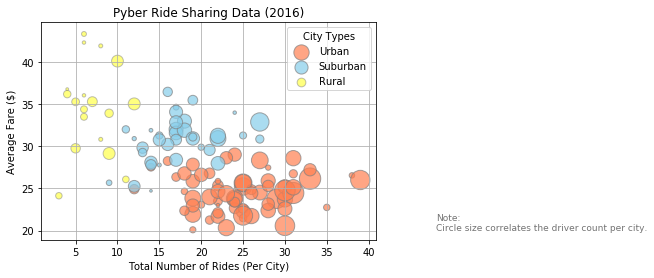

In [101]:
# Obtain the x and y coordinates for each of the three city types
#Urban
urb = merge_data.loc[merge_data['type']=="Urban"]
urb_city = urb.groupby("city")
urb_fare = urb_city["fare"].mean()
urb_rides = urb_city["ride_id"].count()
urb_size = urb_city["driver_count"].sum()
#Suburb
suburb = merge_data.loc[merge_data['type']=="Suburban"]
suburb_city = suburb.groupby("city")
suburb_fare = suburb_city["fare"].mean()
suburb_rides = suburb_city["ride_id"].count()
suburb_size = suburb_city["driver_count"].sum()
#Rural
ru = merge_data.loc[merge_data["type"]=="Rural"]
ru_city = ru.groupby("city")
ru_fare = ru_city["fare"].mean()
ru_rides = ru_city["ride_id"].count()
ru_size = ru_city["driver_count"].sum()


# Build the scatter plots for each city types
Urban= plt.scatter(urb_rides,urb_fare,s=urb_size*.2,
                    c="Coral",
                   edgecolor='grey',
                   label="Urban",
                   alpha=0.7)
#Sub Scatter plot
Suburban= plt.scatter(suburb_rides,suburb_fare,s=suburb_size*.5,
                    c="Skyblue",
                      edgecolor='grey',
                      label="Suburban",
                      alpha=0.7)
#Rural Scatter plot
Rural= plt.scatter(ru_rides,ru_fare,s=ru_size*2,
                    c="Yellow",
                   edgecolor='grey',
                   label="Rural",
                   alpha=0.5)


# Incorporate the other graph properties
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.grid()


# Create a legend
legend = plt.legend(handles=[Urban,Suburban,Rural],title="City Types")


# Incorporate a text label regarding circle size
plt.text (48,20,
          "Note:\nCircle size correlates the driver count per city.",
        fontsize=9, 
        alpha=.55)

# Save Figure
plt.savefig("data/rideshare_data.png")

## Total Fares by City Type

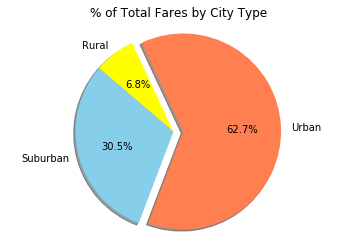

In [102]:
# Calculate Type Percents
type_grpd_percent = merge_data.groupby("type")
Sum_fares = type_grpd_percent["fare"].sum()

#color 
colors = ["Yellow", "Skyblue", "Coral"]
labels = ["Rural", "Suburban", "Urban"]
explode = (0, 0, .1)

# Build Pie Chart 
plt.title("% of Total Fares by City Type",fontsize=12,)
plt.pie(Sum_fares, 
        explode=explode, 
        labels=labels, 
        colors=colors,
        autopct="%1.1f%%", 
        shadow=True, 
        startangle=115)

plt.axis("equal")


# Save Figure
plt.savefig("data/Percentage_of_Fares_ByCity")
plt.show()

## Total Rides by City Type

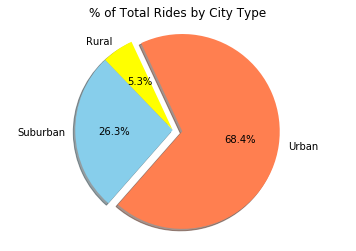

In [103]:
# Calculate Ride Percents
total_rides_percent = type_grpd_percent["ride_id"].count()

# Build Pie Chart
plt.pie(total_rides_percent,
        explode=explode,
        labels=labels,
        colors=colors,
        autopct="%1.1f%%",
        shadow=True,
        startangle=115)

plt.axis("equal")
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("data/Total_Rides_By_City_Type.png")

#show Fig
plt.show()

## Total Drivers by City Type

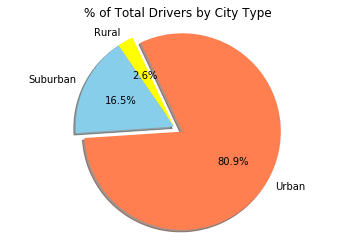

In [104]:
# Calculate Driver Percents
type_grpd_percent = city_data.groupby("type")
total_drivers_percent = type_grpd_percent["driver_count"].sum()
# Build Pie Charts
plt.pie(total_drivers_percent,
        explode=explode,
        labels=labels,
        colors=colors,
        autopct="%1.1f%%",
        shadow=True,
        startangle=115)

plt.axis("equal")
plt.title("% of Total Drivers by City Type")
# Save Figure
plt.savefig("data/Total_Drivers_By_City_Type.png")
plt.show()